In [86]:
!pip install ipython-autotime

time: 3.49 s (started: 2023-08-06 18:09:50 +01:00)


In [87]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-08-06 18:09:55 +01:00)


- I added autotime to calculate importing time so I can compare codes

In [88]:
!pip install pandas openpyxl

time: 2.98 s (started: 2023-08-06 18:09:55 +01:00)


In [89]:
import pandas as pd
import numpy as np

time: 0 ns (started: 2023-08-06 18:09:59 +01:00)


In [90]:
dfwage = pd.read_csv('annualwage.csv')

time: 16 ms (started: 2023-08-06 18:09:59 +01:00)


In [91]:
dfwagex= pd.read_excel('annualwagex1.xlsx', engine='openpyxl')

time: 47 ms (started: 2023-08-06 18:10:00 +01:00)


In [92]:
dfwagex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 26 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [93]:
dfwage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                69 non-null     object 
 1   Country                69 non-null     object 
 2   SERIES                 69 non-null     object 
 3   Series                 69 non-null     object 
 4   TIME                   69 non-null     int64  
 5   Time                   69 non-null     int64  
 6   Unit Code              69 non-null     object 
 7   Unit                   69 non-null     object 
 8   PowerCode Code         69 non-null     int64  
 9   PowerCode              69 non-null     object 
 10  Reference Period Code  0 non-null      float64
 11  Reference Period       0 non-null      float64
 12  Value                  69 non-null     float64
 13  Flag Codes             0 non-null      float64
 14  Flags                  0 non-null      float64
dtypes: float

In [94]:
dfwage.head()

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,DEU,Germany,CPNCU,Current prices in NCU,2000,2000,EUR,Euro,0,Units,NaN,NaN,27993.215537,NaN,NaN
1,DEU,Germany,CPNCU,Current prices in NCU,2001,2001,EUR,Euro,0,Units,NaN,NaN,28786.860680,NaN,NaN
2,DEU,Germany,CPNCU,Current prices in NCU,2002,2002,EUR,Euro,0,Units,NaN,NaN,29328.477986,NaN,NaN
3,DEU,Germany,CPNCU,Current prices in NCU,2003,2003,EUR,Euro,0,Units,NaN,NaN,29861.675671,NaN,NaN
4,DEU,Germany,CPNCU,Current prices in NCU,2004,2004,EUR,Euro,0,Units,NaN,NaN,30179.497733,NaN,NaN


time: 0 ns (started: 2023-08-06 18:10:01 +01:00)


In [95]:
dfemp = pd.read_csv('employment.csv')

time: 16 ms (started: 2023-08-06 18:10:02 +01:00)


In [96]:
dfempx= pd.read_excel('employmentx.xlsx', engine='openpyxl')

time: 31 ms (started: 2023-08-06 18:10:02 +01:00)


In [97]:
dfemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    66 non-null     object 
 1   INDICATOR   66 non-null     object 
 2   SUBJECT     66 non-null     object 
 3   MEASURE     66 non-null     object 
 4   FREQUENCY   66 non-null     object 
 5   TIME        66 non-null     int64  
 6   Value       66 non-null     float64
 7   Flag Codes  12 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.2+ KB
time: 0 ns (started: 2023-08-06 18:10:03 +01:00)


- Here I compared csv and xlsx files importing time. In annual wage files for Csv result is 15 ms. For XLSX file time is 359 ms. For Employment file CSV time is o ns. For XLSX file this time is 47 ms. After seeing the differences in running time between xlsx and csv files, I decided to use CSV file format in my codes.

## Data cleaning and manupilation

In [98]:
columns_to_drop = ['TIME','Country','SERIES','Series','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags']  

dfwage=dfwage.drop(columns_to_drop,axis=1)

time: 0 ns (started: 2023-08-06 18:10:04 +01:00)


In [132]:
# Dropping columns using by for loop
# columns_to_drop = ['TIME', 'Country', 'SERIES', 'Series', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags']

# for column in dfwage.columns:
  #  if column in columns_to_drop:
   #     dfwage.drop(column, axis=1, inplace=True)


time: 0 ns (started: 2023-08-06 18:18:07 +01:00)


- I dropped identical columns and unnecessary columns from my data.

In [99]:
dfwage['Time']=dfwage['Time'].astype(int)

time: 0 ns (started: 2023-08-06 18:10:06 +01:00)


In [100]:
# In my employment data lasts until the year 2021. This is why I removed all the rows with year 2022--
# --from my annual wage data
dfwage = dfwage[dfwage['Time'] !=2022] 

time: 16 ms (started: 2023-08-06 18:10:07 +01:00)


In [101]:
dfwage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 67
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRY    66 non-null     object 
 1   Time       66 non-null     int32  
 2   Unit Code  66 non-null     object 
 3   Value      66 non-null     float64
dtypes: float64(1), int32(1), object(2)
memory usage: 2.3+ KB
time: 15 ms (started: 2023-08-06 18:10:08 +01:00)


In [102]:
columns_to_drop = ['INDICATOR','SUBJECT','FREQUENCY','Flag Codes']
dfemp=dfemp.drop(columns_to_drop,axis=1)

time: 0 ns (started: 2023-08-06 18:10:08 +01:00)


In [103]:
# in Empoyment data Column name was the same with annual wage. I changed Value column to Amount.
dfemp.rename(columns={'Value': 'Amount'}, inplace=True)

time: 0 ns (started: 2023-08-06 18:10:09 +01:00)


In [104]:
dfemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  66 non-null     object 
 1   MEASURE   66 non-null     object 
 2   TIME      66 non-null     int64  
 3   Amount    66 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ KB
time: 0 ns (started: 2023-08-06 18:10:09 +01:00)


In [105]:
# this code concatenates two DataFrames dfwage and dfemp side by side along the columns, --
# -- resulting in a new DataFrame called mergeddf
mergeddf = pd.concat([dfwage, dfemp], axis=1)

time: 0 ns (started: 2023-08-06 18:10:10 +01:00)


In [106]:

mergeddf['Value'] = mergeddf['Value'].astype(float)

time: 0 ns (started: 2023-08-06 18:10:20 +01:00)


In [107]:

mergeddf['Amount'] = mergeddf['Amount'].astype(float)

time: 0 ns (started: 2023-08-06 18:10:23 +01:00)


In [108]:

mergeddf = mergeddf.drop(columns=['LOCATION','TIME'])


time: 0 ns (started: 2023-08-06 18:10:25 +01:00)


In [109]:
mergeddf['Time'].fillna(0, inplace=True)

time: 16 ms (started: 2023-08-06 18:10:26 +01:00)


In Rows Italy, there was some missing data, I replaced this data with NaN

In [110]:
mergeddf['Time'] = mergeddf['Time'].astype(int)

time: 0 ns (started: 2023-08-06 18:10:29 +01:00)


In [111]:
mergeddf.dropna(inplace=True)

time: 0 ns (started: 2023-08-06 18:10:30 +01:00)


Here I dropped NaN values for further calculation

In [113]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 65
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRY    64 non-null     object 
 1   Time       64 non-null     int32  
 2   Unit Code  64 non-null     object 
 3   Value      64 non-null     float64
 4   MEASURE    64 non-null     object 
 5   Amount     64 non-null     float64
dtypes: float64(2), int32(1), object(3)
memory usage: 3.2+ KB
time: 0 ns (started: 2023-08-06 18:10:49 +01:00)


In [114]:
import matplotlib as plt

time: 0 ns (started: 2023-08-06 18:10:59 +01:00)


In [115]:

!pip install plotly

time: 2.89 s (started: 2023-08-06 18:11:01 +01:00)


In [116]:

import plotly.express as px
# Renamed the 'Time' column to 'Year' for consistency with the other part of the code
mergeddf.rename(columns={'Time': 'Year'}, inplace=True)

# Chose a color scale for the choropleth map
color_scale = px.colors.sequential.Plasma[:14]
# Got the minimum and maximum values of the 'Value' column for setting the color range
value_min = mergeddf['Value'].min()
value_max = mergeddf['Value'].max()
# A choropleth map using plotly express
fig=px.choropleth(mergeddf,locations='COUNTRY',
                 color='Value',
                 hover_name='COUNTRY',
                 animation_frame='Year',
                 color_continuous_scale=color_scale,
                 range_color=(value_min, value_max))
fig.update_layout(
title_text='Value Index',
geo= dict(projection={'type':'natural earth'}))
fig.show()

time: 78 ms (started: 2023-08-06 18:11:05 +01:00)


In [117]:
mergeddf.describe()

,Year,Value,Amount
count,64.000000,64.000000,64.000000
mean,2010.187500,34302.407841,21426.400156
std,6.235777,7568.240289,15280.608765
min,2000.000000,21254.259274,1745.200000
25%,2005.000000,28521.250000,2215.675000
50%,2010.000000,32265.000000,22581.485000
75%,2015.250000,42328.500000,36563.887500
max,2021.000000,50665.304664,42398.520000


time: 0 ns (started: 2023-08-06 18:11:06 +01:00)


 # Comparing Seaborn and Plotly.express

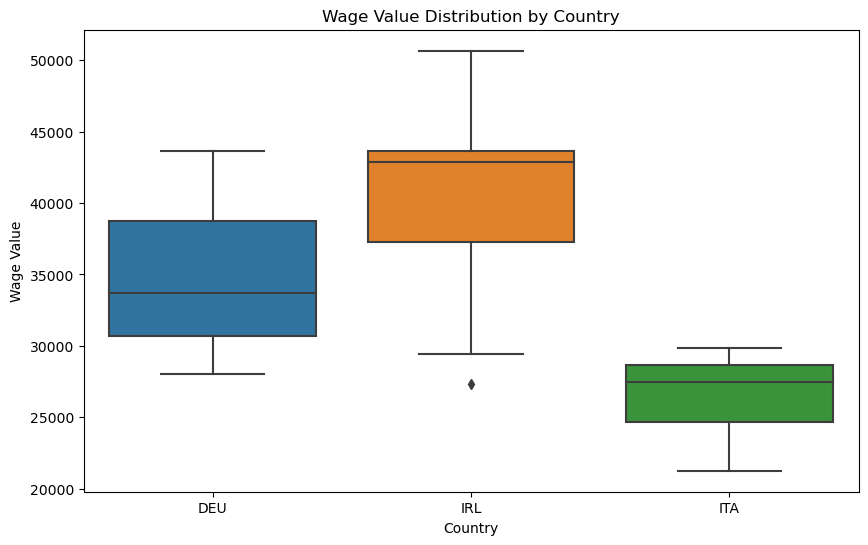

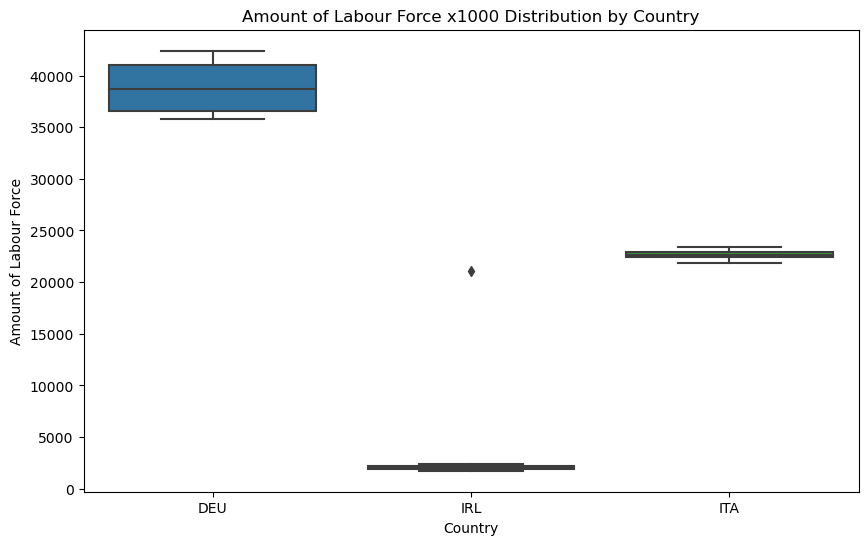

time: 266 ms (started: 2023-08-06 18:11:10 +01:00)


In [118]:
# Step 1: Data for the three countries using country codes
country_codes = ['ITA', 'DEU', 'IRL']
mergeddf_filtered = mergeddf[mergeddf['COUNTRY'].isin(country_codes)]

# Step 2: Descriptive statistics and visualizations
# Descriptive statistics by country
statistics_by_country = mergeddf_filtered.groupby('COUNTRY').agg({
    'Value': ['mean', 'median', 'std'],
    'Amount': ['mean', 'median', 'std']
})

# Box plots for Wage Values and Amount of Labor Force by country
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='COUNTRY', y='Value', data=mergeddf_filtered)
plt.xlabel('Country')
plt.ylabel('Wage Value')
plt.title('Wage Value Distribution by Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='COUNTRY', y='Amount', data=mergeddf_filtered)
plt.xlabel('Country')
plt.ylabel('Amount of Labour Force')
plt.title('Amount of Labour Force x1000 Distribution by Country')
plt.show()


In [119]:
# Step 1: Data for the three countries using country codes
country_codes = ['ITA', 'DEU', 'IRL']
mergeddf_filtered = mergeddf[mergeddf['COUNTRY'].isin(country_codes)]

# Step 2: Descriptive statistics and visualizations
# Descriptive statistics by country
statistics_by_country = mergeddf_filtered.groupby('COUNTRY').agg({
    'Value': ['mean', 'median', 'std'],
    'Amount': ['mean', 'median', 'std']
})

# Box plots for Wage Values and Amount of Labor Force by country
fig_value = px.box(mergeddf_filtered, x='COUNTRY', y='Value', color='COUNTRY', title='Wage Value Distribution by Country')
fig_value.show()

fig_amount = px.box(mergeddf_filtered, x='COUNTRY', y='Amount', color='COUNTRY', title='Amount of Labour Force x1000 Distribution by Country')
fig_amount.show()


time: 93 ms (started: 2023-08-06 18:11:11 +01:00)


In [120]:
# Data for the three countries (DEU, IRL, ITA)
countries = ['DEU', 'IRL', 'ITA']
df_filtered = mergeddf[mergeddf['COUNTRY'].isin(countries)]

# line chart for Labor Force
fig_labor_force = px.line(df_filtered, x='Year', y='Amount', color='COUNTRY', 
                          title='Labor Force x1000 by Year for DEU, IRL, and ITA',
                          labels={'Amount': 'Labour Force'},
                          template='plotly_dark')

# line chart for Annual Wage
fig_annual_wage = px.line(df_filtered, x='Year', y='Value', color='COUNTRY', 
                          title='Annual Wage by Year for DEU, IRL, and ITA',
                          labels={'Value': 'Annual Wage'},
                          template='plotly_dark')

# Graphs
fig_labor_force.show()
fig_annual_wage.show()


time: 78 ms (started: 2023-08-06 18:11:12 +01:00)


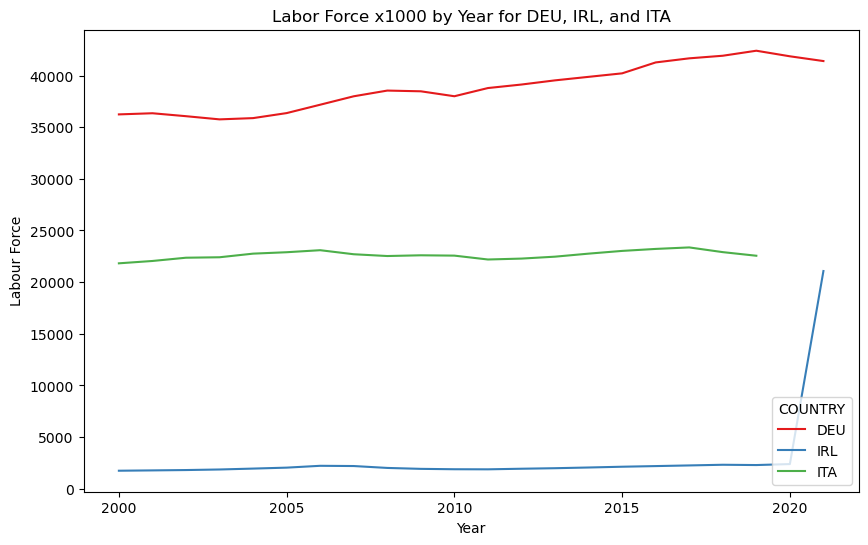

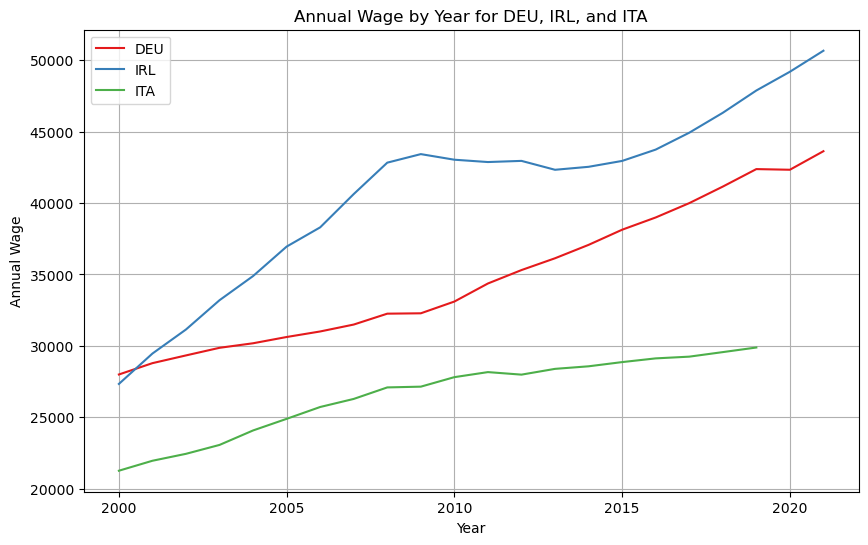

time: 328 ms (started: 2023-08-06 18:11:12 +01:00)


In [121]:
countries = ['DEU', 'IRL', 'ITA']
df_filtered = mergeddf[mergeddf['COUNTRY'].isin(countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Year', y='Amount', hue='COUNTRY', palette='Set1')
plt.title('Labor Force x1000 by Year for DEU, IRL, and ITA')
plt.xlabel('Year')
plt.ylabel('Labour Force')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Year', y='Value', hue='COUNTRY', palette='Set1')
plt.title('Annual Wage by Year for DEU, IRL, and ITA')
plt.xlabel('Year')
plt.ylabel('Annual Wage')
plt.grid(True)
plt.legend()
plt.show()

# Results of comparing
### Distribution Graphs 
- sns graphs takes 1.58 s 
- px graphs takes 156 ms
### Line Graphs
- sns graphs takes 328 ms
- px graphs takes 78 ms
### Conclusion
- as we see from the results compare to seaborn, plotly express is faster. Beyond that Plotly express graphs are easier to read and understand. The Live graphs helps us to check values in every part of Graphs. 

# Statistic Tests
- T-Test
- ANOVA
- Chi-Squared Test
- Paired T-Test
- Wilcoxon Signed Rank Test

In [122]:
import scipy.stats as stats

# Data for Germany (DEU) and Italy (ITA)
country1 = 'DEU'
country2 = 'IRL'
df_country1 = mergeddf[mergeddf['COUNTRY'] == country1]
df_country2 = mergeddf[mergeddf['COUNTRY'] == country2]

# t-test for labor force
t_stat_labour_force, p_value_labour_force = stats.ttest_ind(df_country1['Amount'], df_country2['Amount'], equal_var=False)

# t-test for annual wage
t_stat_annual_wage, p_value_annual_wage = stats.ttest_ind(df_country1['Value'], df_country2['Value'], equal_var=False)

print(f'T-Test Results for Labor Force:')
print(f'T-Statistic: {t_stat_labour_force}')
print(f'P-Value: {p_value_labour_force}')
print('\n')
print(f'T-Test Results for Annual Wage:')
print(f'T-Statistic: {t_stat_annual_wage}')
print(f'P-Value: {p_value_annual_wage}')


T-Test Results for Labor Force:
T-Statistic: 36.37737610526868
P-Value: 5.451691231577604e-28


T-Test Results for Annual Wage:
T-Statistic: -3.503333671583296
P-Value: 0.0011509542377083678
time: 15 ms (started: 2023-08-06 18:11:18 +01:00)


In [123]:
# Data for Germany (DEU) and Italy (ITA)
country1 = 'DEU'
country2 = 'ITA'
df_country1 = mergeddf[mergeddf['COUNTRY'] == country1]
df_country2 = mergeddf[mergeddf['COUNTRY'] == country2]

# t-test for labor force
t_stat_labour_force, p_value_labour_force = stats.ttest_ind(df_country1['Amount'], df_country2['Amount'], equal_var=False)

# t-test for annual wage
t_stat_annual_wage, p_value_annual_wage = stats.ttest_ind(df_country1['Value'], df_country2['Value'], equal_var=False)

print(f'T-Test Results for Labor Force:')
print(f'T-Statistic: {t_stat_labour_force}')
print(f'P-Value: {p_value_labour_force}')
print('\n')
print(f'T-Test Results for Annual Wage:')
print(f'T-Statistic: {t_stat_annual_wage}')
print(f'P-Value: {p_value_annual_wage}')


T-Test Results for Labor Force:
T-Statistic: 33.52784074963676
P-Value: 1.1932477569892006e-20


T-Test Results for Annual Wage:
T-Statistic: 6.788874889956536
P-Value: 9.179068905936603e-08
time: 0 ns (started: 2023-08-06 18:11:20 +01:00)


In [124]:
# Data for Germany (DEU) and Italy (ITA)
country1 = 'ITA'
country2 = 'IRL'
df_country1 = mergeddf[mergeddf['COUNTRY'] == country1]
df_country2 = mergeddf[mergeddf['COUNTRY'] == country2]

# t-test for labor force
t_stat_labour_force, p_value_labour_force = stats.ttest_ind(df_country1['Amount'], df_country2['Amount'], equal_var=False)

# t-test for annual wage
t_stat_annual_wage, p_value_annual_wage = stats.ttest_ind(df_country1['Value'], df_country2['Value'], equal_var=False)

print(f'T-Test Results for Labor Force:')
print(f'T-Statistic: {t_stat_labour_force}')
print(f'P-Value: {p_value_labour_force}')
print('\n')
print(f'T-Test Results for Annual Wage:')
print(f'T-Statistic: {t_stat_annual_wage}')
print(f'P-Value: {p_value_annual_wage}')


T-Test Results for Labor Force:
T-Statistic: 22.655816528635135
P-Value: 1.8655569289719938e-16


T-Test Results for Annual Wage:
T-Statistic: -9.67691449730343
P-Value: 1.2623349332703372e-10
time: 0 ns (started: 2023-08-06 18:11:27 +01:00)


In [125]:
# Data for the three countries (DEU, IRL, ITA)
countries = ['DEU', 'IRL', 'ITA']
df_filtered = mergeddf[mergeddf['COUNTRY'].isin(countries)]

# ANOVA test for labor force
anova_labor_force = stats.f_oneway(
    df_filtered[df_filtered['COUNTRY'] == 'DEU']['Amount'],
    df_filtered[df_filtered['COUNTRY'] == 'IRL']['Amount'],
    df_filtered[df_filtered['COUNTRY'] == 'ITA']['Amount']
)

# ANOVA test for annual wage
anova_annual_wage = stats.f_oneway(
    df_filtered[df_filtered['COUNTRY'] == 'DEU']['Value'],
    df_filtered[df_filtered['COUNTRY'] == 'IRL']['Value'],
    df_filtered[df_filtered['COUNTRY'] == 'ITA']['Value']
)

# ANOVA test results
print('ANOVA Test Results for Labor Force:')
print(f'F-Statistic: {anova_labor_force.statistic}')
print(f'P-Value: {anova_labor_force.pvalue}')
print('\n')
print('ANOVA Test Results for Annual Wage:')
print(f'F-Statistic: {anova_annual_wage.statistic}')
print(f'P-Value: {anova_annual_wage.pvalue}')


ANOVA Test Results for Labor Force:
F-Statistic: 957.6456262355446
P-Value: 8.493878470922954e-47


ANOVA Test Results for Annual Wage:
F-Statistic: 43.88470552708337
P-Value: 1.5520075651501518e-12
time: 47 ms (started: 2023-08-06 18:11:32 +01:00)


In [126]:

# Data for the three countries (DEU, IRL, ITA)
countries = ['DEU', 'IRL', 'ITA']
df_filtered = mergeddf[mergeddf['COUNTRY'].isin(countries)]

# Contingency table to cross-tabulate the frequencies of 'Category' for each country
contingency_table = pd.crosstab(df_filtered['COUNTRY'], df_filtered['Amount'])

# Chi-Squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Chi-Squared test results
print('Chi-Squared Test Results:')
print(f'Chi-Squared Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)


Chi-Squared Test Results:
Chi-Squared Statistic: 128.0
P-Value: 0.38454839110099576
Degrees of Freedom: 124
Expected Frequencies:
[[0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.6875  0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375]
 [0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.6875  0.34375
  0.34375 0.34375 0.34375 0.34375 0.34375 0.34375 0.343

In [127]:
# Data for the three countries (DEU, IRL, ITA)
countries = ['DEU', 'IRL', 'ITA']
df_filtered = mergeddf[mergeddf['COUNTRY'].isin(countries)]

# Paired t-test for labor force and annual wage for each country
for country in countries:
    labor_force_data = df_filtered[df_filtered['COUNTRY'] == country]['Amount']
    annual_wage_data = df_filtered[df_filtered['COUNTRY'] == country]['Value']
    
    # paired t-test
    t_statistic, p_value = stats.ttest_rel(labor_force_data, annual_wage_data)
    
    # Paired t-test results for each country
    print(f'Paired T-Test Results for {country}:')
    print(f'T-Statistic: {t_statistic}')
    print(f'P-Value: {p_value}')
    print('\n')


Paired T-Test Results for DEU:
T-Statistic: 6.655072328429783
P-Value: 1.3765067075098644e-06


Paired T-Test Results for IRL:
T-Statistic: -29.4907291993336
P-Value: 1.4174075222819545e-18


Paired T-Test Results for ITA:
T-Statistic: -6.965656511356947
P-Value: 1.2284339710301159e-06


time: 0 ns (started: 2023-08-06 18:11:37 +01:00)


In [128]:
# Data for the three countries (DEU, IRL, ITA)
countries = ['DEU', 'IRL', 'ITA']
df_filtered = mergeddf[mergeddf['COUNTRY'].isin(countries)]

# Wilcoxon signed-rank test for labor force and annual wage for each country
for country in countries:
    labor_force_data = df_filtered[df_filtered['COUNTRY'] == country]['Amount']
    annual_wage_data = df_filtered[df_filtered['COUNTRY'] == country]['Value']
    
    # Wilcoxon signed-rank test
    statistic, p_value = stats.wilcoxon(labor_force_data, annual_wage_data)
    
    # Wilcoxon test results for each country
    print(f'Wilcoxon Signed-Rank Test Results for {country}:')
    print(f'Statistic: {statistic}')
    print(f'P-Value: {p_value}')
    print('\n')


Wilcoxon Signed-Rank Test Results for DEU:
Statistic: 8.0
P-Value: 1.1920928955078125e-05


Wilcoxon Signed-Rank Test Results for IRL:
Statistic: 0.0
P-Value: 4.76837158203125e-07


Wilcoxon Signed-Rank Test Results for ITA:
Statistic: 5.0
P-Value: 1.9073486328125e-05


time: 16 ms (started: 2023-08-06 18:11:42 +01:00)


C:\Users\farha\AppData\Local\Temp\ipykernel_8768\756417914.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



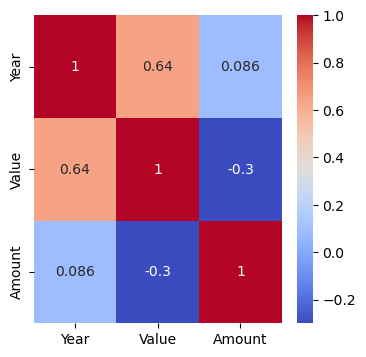

time: 109 ms (started: 2023-08-06 18:12:14 +01:00)


In [129]:
#lets see the correlation between the columns and show it in a heatmap
corr = mergeddf.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [130]:
# Calculating the correlation matrix
corr = mergeddf.corr()

# Createing a heatmap using plotly express
fig = px.imshow(corr,
                x=corr.columns,
                y=corr.columns,
                color_continuous_scale='RdBu',
                zmin=-1, zmax=1,  # Set the range of color scale to match -1 to 1 for correlations
                labels=dict(x='Column', y='Column', color='Correlation'),
                title='Correlation Heatmap',
                template='plotly_dark')

# Correlation heatmap
fig.show()


C:\Users\farha\AppData\Local\Temp\ipykernel_8768\1847096665.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



time: 31 ms (started: 2023-08-06 18:12:17 +01:00)


- Here again I compared seaborn and plotly express libraries
- sns 125 ms
- px 31ms


# Machine-Learning
## Sentiment Analysis

In [55]:
!pip install praw

In [56]:
import praw

time: 250 ms (started: 2023-08-06 16:15:53 +01:00)


- With praw, I can access Reddit's posts, comments, user data, and more.

In [57]:
reddit = praw.Reddit(client_id='-ko9bC2YWTbDzNpiZ3wFlw',
                     client_secret='r-PcIjLVWy7QL_U_ueWqGA8MWFCiuw',
                     user_agent='Assesment',
                     username='****',
                     password='****')

time: 265 ms (started: 2023-08-06 16:16:49 +01:00)


Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


In [58]:
post = reddit.submission(url='https://www.reddit.com/r/ireland/comments/uum52e/staff_shortage_across_ireland_why_are_150000/')
text =pd.DataFrame(columns=['text'])

post.comments.replace_more(limit=100)
for comment in post.comments.list():
     text = pd.concat([text, pd.DataFrame({'text': [comment.body]})])
print(text)

                                                 text
0                                           [deleted]
0   I’ve been applying to jobs non stop for 6 mont...
0                                           [deleted]
0   I am a chef and I left the industry after 22 y...
0   I'll tell you about this fella. A pure cod.\n\...
..                                                ...
0   Aye mate. I know it's nothing like your caviar...
0   I already have a job. I just don't have a peas...
0   I can tell. You just want more and more becaus...
0   >Thank fuck you're not in charge or else we wo...
0   Too thick? I literally disproved every single ...

[302 rows x 1 columns]
time: 9.77 s (started: 2023-08-06 16:22:17 +01:00)


In [131]:
import nltk
import re
nltk.download('stopwords')
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from tqdm import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import AutoModelForTokenClassification
from transformers import pipeline
from transformers import AutoModel
from scipy.special import softmax
from transformers import ElectraForSequenceClassification
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import sys

time: 0 ns (started: 2023-08-06 18:13:38 +01:00)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
def clean_text(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'/','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?://\S+','',text)
    return text
text['text']=text['text'].apply(clean_text)
def implementing_sentiment_model(model_name):

    tokenizer= AutoTokenizer.from_pretrained(model_name)
    model= AutoModelForSequenceClassification.from_pretrained(model_name)
    sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)
    return sa

sent_model=implementing_sentiment_model("cardiffnlp/twitter-roberta-base-sentiment-latest")
#Scoring the data
def scoring_sentiment(data,model,content_columns_name):
    savasy_list=[]
    for i , row in tqdm(data.iterrows(), total=len(data)):
        try:
            sent_an=model(row[content_columns_name])
            norm_val=sent_an[0]['score']
            savasy_list.append([sent_an[0]['label'],norm_val,row[content_columns_name]])
        except:
            continue
    reddit_df=pd.DataFrame(savasy_list,columns=['label','score','article'])
    return reddit_df

scored_data=scoring_sentiment(text,sent_model,'text') 

reddit_df=pd.DataFrame(scored_data,columns=['label','score','article'])

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
100%|████████████████████████████████████████████████████████████████████████████████| 302/302 [32:17<00:00,  

time: 32min 20s (started: 2023-08-06 16:23:06 +01:00)


In [61]:
reddit_df

,label,score,article
0,neutral,0.847928,[deleted]
1,negative,0.794948,I’ve been applying to jobs non stop for 6 mont...
2,neutral,0.847928,[deleted]
3,negative,0.814895,I am a chef and I left the industry after 22 y...
4,neutral,0.552900,I'll tell you about this fella. A pure cod.A g...
...,...,...,...
297,neutral,0.511450,Aye mate. I know it's nothing like your caviar...
298,positive,0.586746,I already have a job. I just don't have a peas...
299,negative,0.935803,I can tell. You just want more and more becaus...
300,negative,0.941837,>Thank fuck you're not in charge or else we wo...


time: 31 ms (started: 2023-08-06 16:56:08 +01:00)


In [62]:

# Grouping the data by sentiment labels and calculate the mean score
sentiment_scores = reddit_df.groupby('label')['score'].mean().reset_index()

# interactive bar plot
fig = px.bar(sentiment_scores, x='label', y='score', color='label', 
             title='Sentiment Analysis Results', labels={'score': 'Average Score'})

fig.show()
fig.write_html("C:/Users/farha/Downloads/SentimentEMP.html")

time: 157 ms (started: 2023-08-06 16:56:16 +01:00)


- Reddit License
- Reddit grants you, subject to your complete and ongoing compliance with the Data API Terms, a non-exclusive, non-transferable, non-sublicensable, and revocable license solely to access and use the Data APIs as expressly permitted under and in accordance with the Data API Terms. All rights not expressly granted to you are reserved by Reddit.

# Licensing
- The OECD makes data (the “Data”) available for use and consultation by the public.  Data may be subject to restrictions beyond the scope of these Terms and Conditions, either because specific terms apply to those Data or because third parties may have ownership interests. It is the User’s responsibility to verify, either directly in the metadata or, if available, by clicking on the  icon and then referring to the "source" tab, whether the Data is fully or partially owned by third parties and/or whether additional restrictions may apply, and to contact the owner of the Data before incorporating it in your work in order to secure the necessary permissions. The OECD in no way represents or warrants that it owns or controls all rights in all Data, and the OECD will not be liable to any User for any claims brought against the User by third parties in connection with the use of any Data.


- Permitted use

- Except where additional restrictions apply as stated above, You can extract from, download, copy, adapt, print, distribute, share and embed Data for any purpose, even for commercial use. You must give appropriate credit to the OECD by using the citation associated with the relevant Data, or, if no specific citation is available, You must cite the source information using the following format: OECD (year), (dataset name),(data source) DOI or URL (accessed on (date)). When sharing or licensing work created using the Data, You agree to include the same acknowledgment requirement in any sub-licenses that You grant, along with the requirement that any further sub-licensees do the same.